<a href="https://colab.research.google.com/github/Lilia2022/MachineLearning_Assignment_IIITD/blob/main/A1_2021411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Load the Kepler Exoplanet dataset
file_path = 'cumulative.csv'
kepler_data = pd.read_csv(file_path)

In [ ]:
# Check for missing values in the dataset
missing_values = kepler_data.isnull().sum()

In [ ]:
# Dropping columns with too many missing values (more than 50% missing)
threshold = 0.5 * len(kepler_data)
columns_to_drop = missing_values[missing_values > threshold].index
kepler_data_cleaned = kepler_data.drop(columns=columns_to_drop)


In [ ]:
# Impute missing values with mean (for numerical columns) mean imputation
numerical_columns = kepler_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
kepler_data_cleaned[numerical_columns] = kepler_data_cleaned[numerical_columns].fillna(kepler_data_cleaned[numerical_columns].mean())


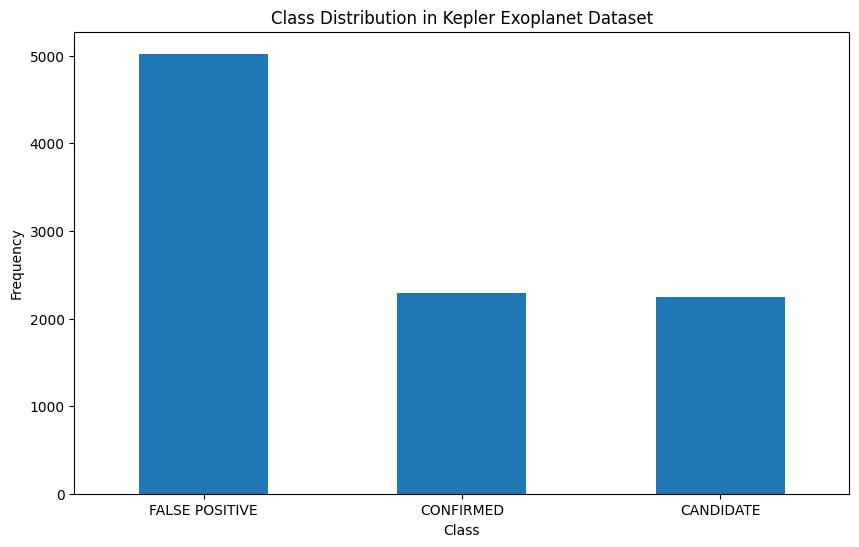

In [ ]:
# Check for class imbalance (Histogram for 'koi_disposition')
class_distribution = kepler_data_cleaned['koi_disposition'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Kepler Exoplanet Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
# Compute summary statistics and correlation matrix
summary_statistics = kepler_data_cleaned.describe()
print('summary_statistics', summary_statistics)
correlation_matrix = kepler_data_cleaned.corr()


summary_statistics              rowid         kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  \
count  9564.000000  9.564000e+03  9564.000000    9564.000000    9564.000000   
mean   4782.500000  7.690628e+06     0.480829       0.188206       0.231598   
std    2761.033321  2.653459e+06     0.437658       0.390897       0.421875   
min       1.000000  7.574500e+05     0.000000       0.000000       0.000000   
25%    2391.750000  5.556034e+06     0.000000       0.000000       0.000000   
50%    4782.500000  7.906892e+06     0.480829       0.000000       0.000000   
75%    7173.250000  9.873066e+06     0.995000       0.000000       0.000000   
max    9564.000000  1.293514e+07     1.000000       1.000000       1.000000   

       koi_fpflag_co  koi_fpflag_ec     koi_period  koi_period_err1  \
count    9564.000000    9564.000000    9564.000000      9564.000000   
mean        0.194898       0.120033      75.671358         0.002148   
std         0.396143       0.325018    1334.744046      

<ipython-input-7-6d6e370530e4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kepler_data_cleaned.corr()


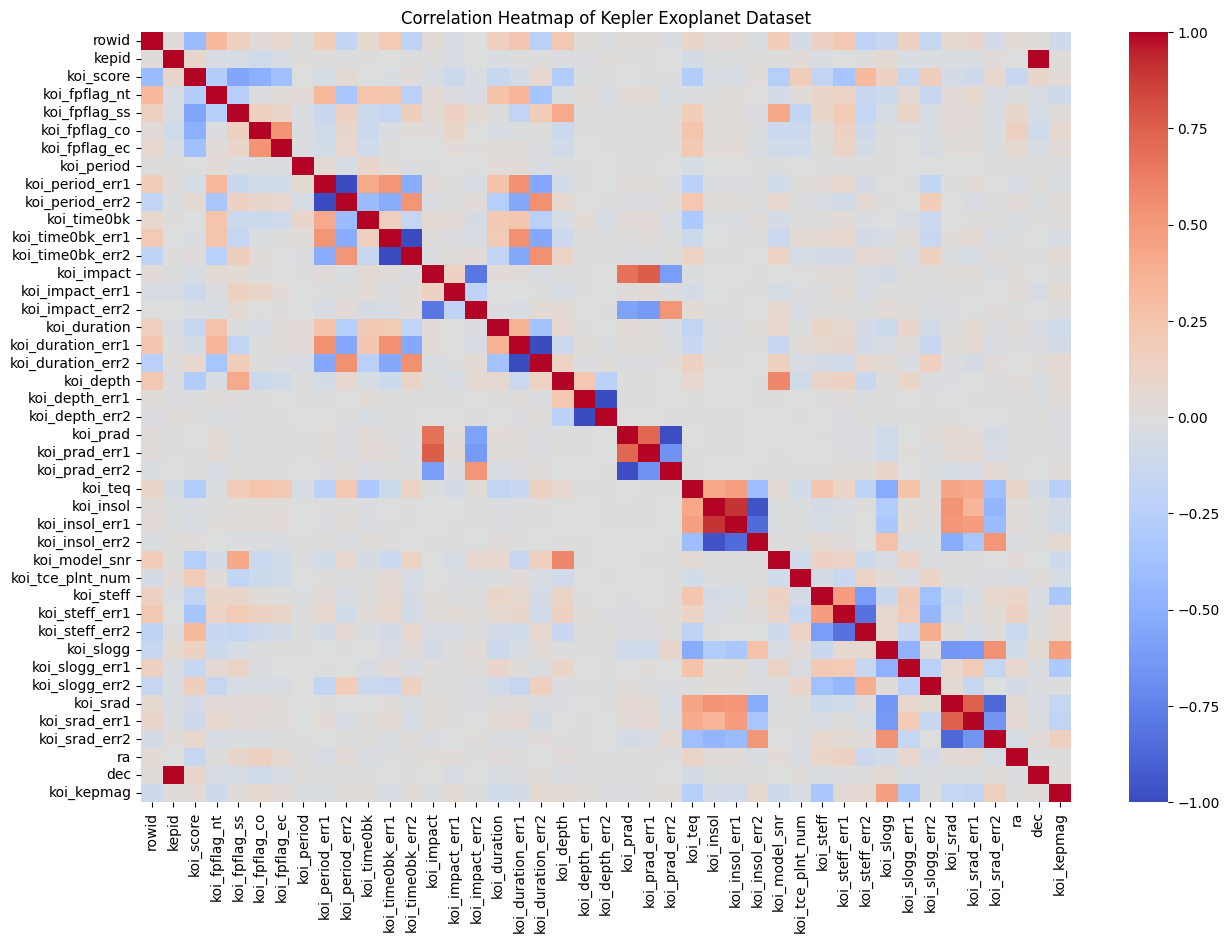

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Kepler Exoplanet Dataset')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
# Compute the covariance matrix
covariance_matrix = kepler_data_cleaned.cov()
# print('covariance_matrix', covariance_matrix)
#

<ipython-input-9-569c9038b586>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = kepler_data_cleaned.cov()


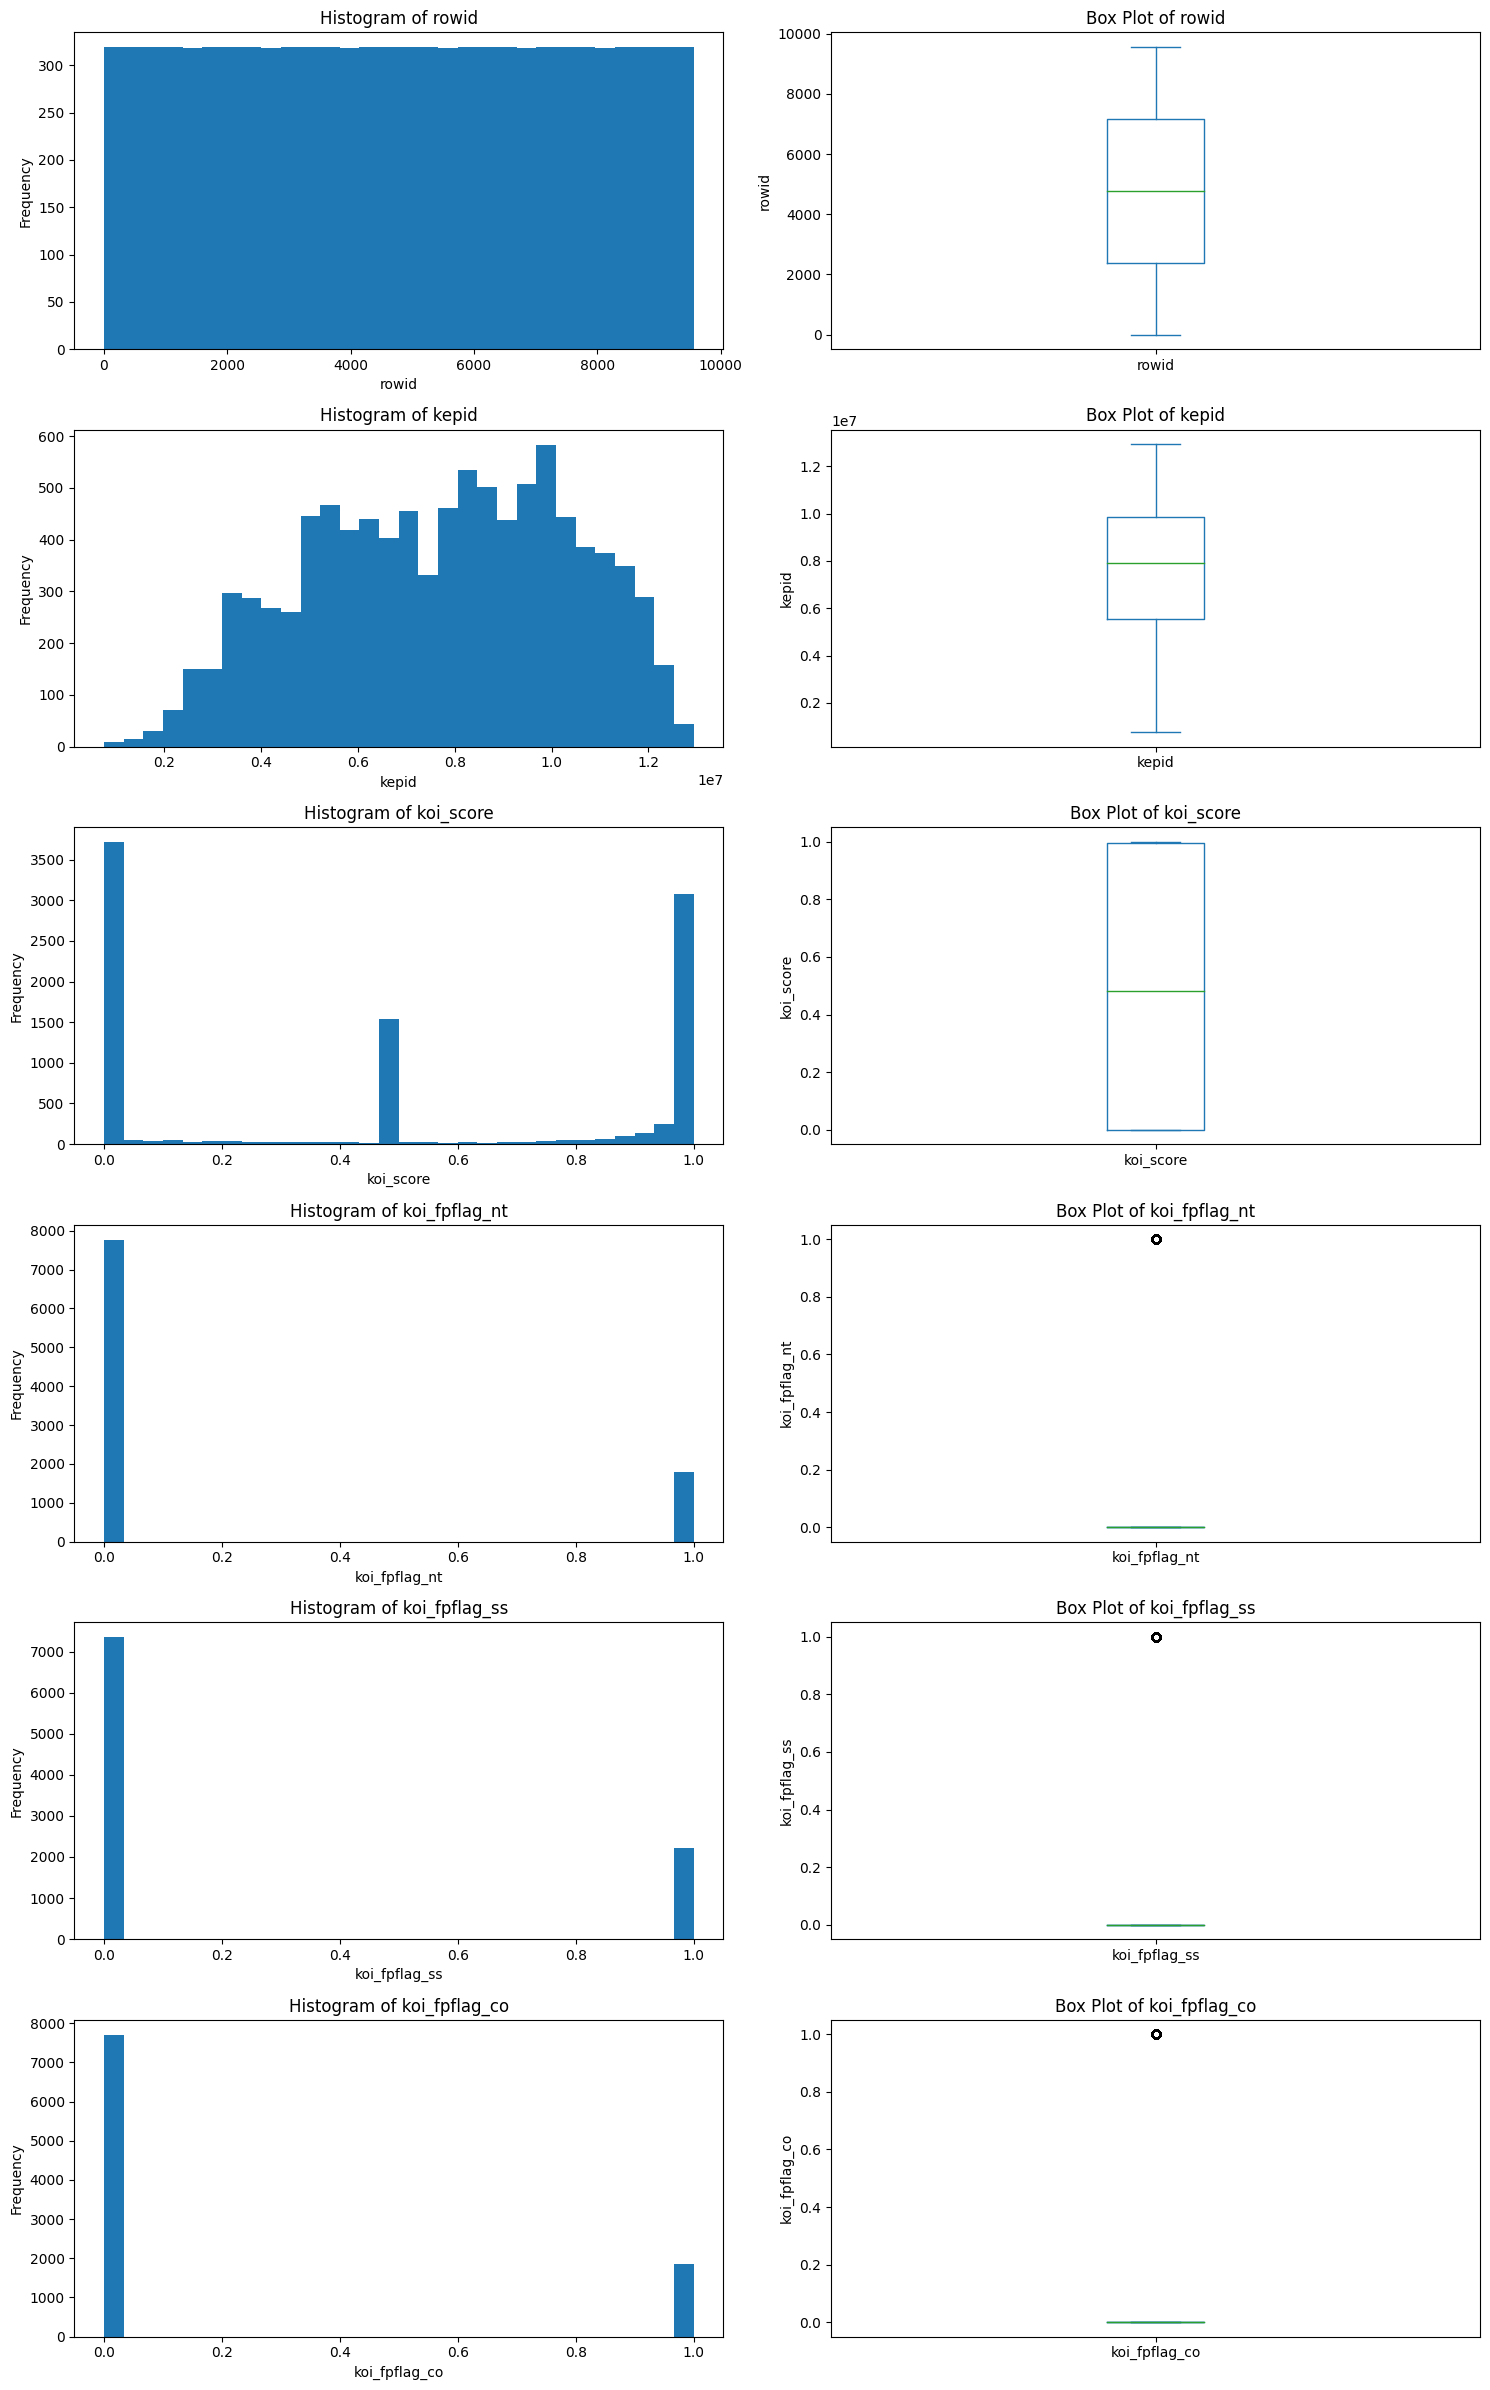

In [ ]:
selected_columns = numerical_columns[:6]  # Example with first 6 numerical columns
fig, axes = plt.subplots(len(selected_columns), 2, figsize=(15, 4 * len(selected_columns)))
for i, col in enumerate(selected_columns):
    # Histogram
    kepler_data_cleaned[col].plot(kind='hist', ax=axes[i, 0], bins=30, title=f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    # Box plot
    kepler_data_cleaned[col].plot(kind='box', ax=axes[i, 1], title=f'Box Plot of {col}')
    axes[i, 1].set_ylabel(col)
plt.tight_layout()
plt.savefig('histograms_boxplots.png')
plt.show()

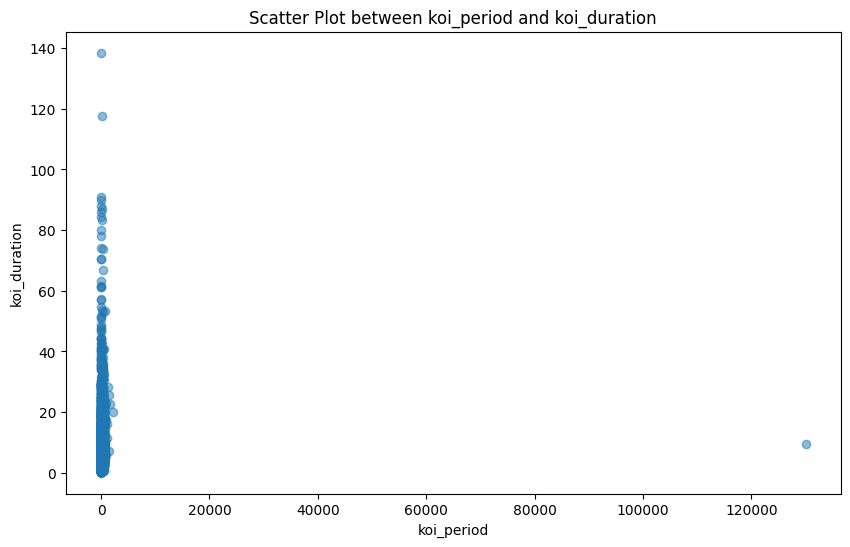

In [ ]:
# Scatter plot example (koi_period vs koi_duration)
plt.figure(figsize=(10, 6))
plt.scatter(kepler_data_cleaned['koi_period'], kepler_data_cleaned['koi_duration'], alpha=0.5)
plt.title('Scatter Plot between koi_period and koi_duration')
plt.xlabel('koi_period')
plt.ylabel('koi_duration')
plt.savefig('scatter_plot.png')
plt.show()

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
numerical_data = kepler_data_cleaned.select_dtypes(include=['float64', 'int64'])
normalized_data = scaler.fit_transform(numerical_data)
normalized_data_df = pd.DataFrame(normalized_data, columns=numerical_data.columns)


In [ ]:
# Summary statistics for normalized data
normalized_summary_statistics = normalized_data_df.describe()
print('normalized_summary_statistics', normalized_summary_statistics)



normalized_summary_statistics             rowid        kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  \
count  9564.00000  9564.000000  9564.000000    9564.000000    9564.000000   
mean      0.50000     0.569334     0.480829       0.188206       0.231598   
std       0.28872     0.217895     0.437658       0.390897       0.421875   
min       0.00000     0.000000     0.000000       0.000000       0.000000   
25%       0.25000     0.394047     0.000000       0.000000       0.000000   
50%       0.50000     0.587093     0.480829       0.000000       0.000000   
75%       0.75000     0.748550     0.995000       0.000000       0.000000   
max       1.00000     1.000000     1.000000       1.000000       1.000000   

       koi_fpflag_co  koi_fpflag_ec   koi_period  koi_period_err1  \
count    9564.000000    9564.000000  9564.000000      9564.000000   
mean        0.194898       0.120033     0.000580         0.012451   
std         0.396143       0.325018     0.010268         0.046600   


In [ ]:
#PART B

In [ ]:
# Replace with the actual file paths for train and test CSV files
train_csv_path = 'fashion-mnist_train.csv'
test_csv_path = 'fashion-mnist_test.csv'

In [ ]:
# Load the datasets
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


In [ ]:
# Separate labels and pixel values
train_labels = train_df.iloc[:, 0].to_numpy()
train_images = train_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28)  # Reshape to 28x28 images


In [ ]:
# Separate labels and pixel values
train_labels = train_df.iloc[:, 0].to_numpy()
train_images = train_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28)  # Reshape to 28x28 images


In [ ]:
test_labels = test_df.iloc[:, 0].to_numpy()
test_images = test_df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28)


In [ ]:
# Class names in Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# Function to plot images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10),)
    for i in range(10):  # There are 10 classes
        class_indices = np.where(labels == i)[0]
        selected_indices = class_indices[:5]  # Select the first 5 images from each class
        for j, index in enumerate(selected_indices):
            plt.subplot(10, 5, i*5 + j + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[index], cmap=plt.cm.binary)
            plt.xlabel(class_names[i])
    plt.savefig('plot_images.png')
    plt.show()

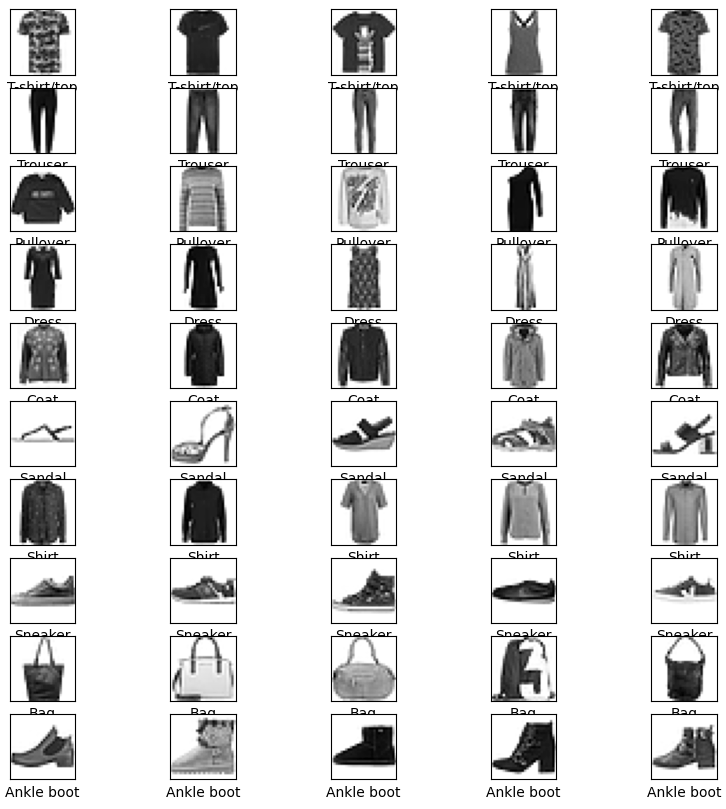

In [ ]:
# Plot five images from each class
plot_images(train_images, train_labels, class_names)



In [ ]:
# Count the frequency of each label in the training set
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))


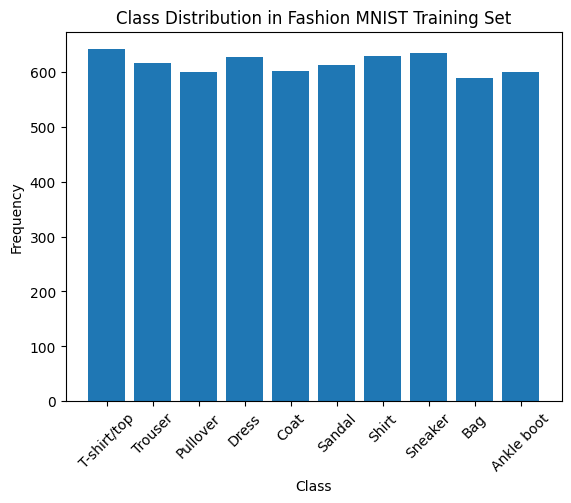

In [ ]:
# Plotting the class distribution
plt.bar(range(len(class_distribution)), list(class_distribution.values()), tick_label=class_names)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Fashion MNIST Training Set')
plt.xticks(rotation=45)
plt.savefig('2nd class_distribution.png')
plt.show()

In [ ]:
# Flatten the image data for intensity distribution analysis
flattened_images = train_images.reshape(-1)


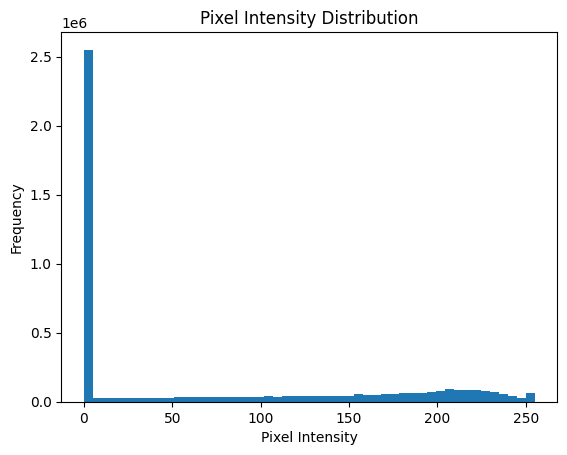

In [ ]:
# Plotting the pixel intensity distribution
plt.hist(flattened_images, bins=50, range=[0,255])
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.savefig('pixel_intensity_distribution.png')
plt.show()

In [ ]:
# Mean and Standard Deviation of the training images
mean_intensity = np.mean(train_images)
std_intensity = np.std(train_images)

print(f"Mean Pixel Intensity: {mean_intensity}")
print(f"Standard Deviation of Pixel Intensity: {std_intensity}")


Mean Pixel Intensity: nan
Standard Deviation of Pixel Intensity: nan


In [ ]:
# Normalize the training and test images
# Normalize the pixel values
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

print(f"Minimum Pixel Value: {np.min(train_images_normalized)}")
print(f"Maximum Pixel Value: {np.max(train_images_normalized)}")


Minimum Pixel Value: nan
Maximum Pixel Value: nan
